In [147]:
### load library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Plotint setting 
%matplotlib inline
sns.set(style="white",palette= "muted")
sns.set_context("talk", font_scale=0.9)#, rc={"lines.linewidth": 1})



* #### Check the data. Never assume data is right. Always check data reliability and, if you find that some data doesn't make sense, clean it
* #### Focus on  business impact  your work cold have. How would the company benefit from your analysis? What  you suggest as a next step?




In [2]:
# Load data 

df = pd.read_csv("./conversion_data.csv")


In [22]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [20]:
### check for non-numeric type 
df.describe(include=['object', 'bool'])

,country,source
count,316200,316200
unique,4,3
top,US,Seo
freq,178092,155040


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [9]:
# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

In [10]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  299903
       country  age  new_user source  total_pages_visited  converted
20029    China   17         0    Ads                    1          0
21506    China   17         0    Ads                    1          0
24947    China   17         0    Ads                    1          0
112472   China   17         0    Ads                    1          0
147042   China   17         0    Ads                    1          0


In [324]:
###  Print top 5 most frequent distinct value 
for column in df.columns:
    top_freq = list(df[column].value_counts().index)
    print('{0:20s} {1:5d}\t'.format(column, len(top_freq)), top_freq[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


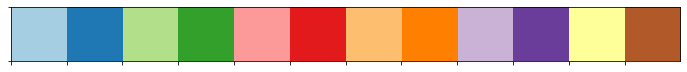

In [24]:
sns.palplot(sns.color_palette("Paired"))

In [27]:
sns.set_palette("Paired")

In [28]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


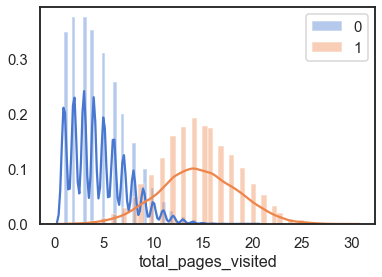

In [185]:
for i in df['converted'].unique():
    sns.distplot(df.loc[df['converted']==i,'total_pages_visited'],label=i)
    plt.legend()

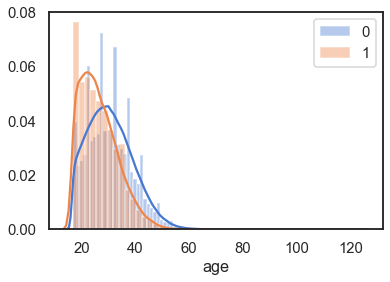

In [188]:
sns.distplot(df.loc[df['converted']==0,'age'],label = '0')
sns.distplot(df.loc[df['converted']==1,'age'],label = '1')
plt.legend()

In [ ]:
df_count = df.groupby(['country','converted']).count().reset_index()
df_count

In [189]:
df_mean =  df.groupby(['source','new_user']).mean().reset_index()
df_mean

,source,new_user,age,total_pages_visited,converted
0,Ads,0,30.396580,5.346277,0.078341
1,Ads,1,30.598071,4.694769,0.014380
2,Direct,0,30.442058,5.176382,0.061161
3,Direct,1,30.625387,4.653010,0.013128
4,Seo,0,30.421380,5.290425,0.073414
5,Seo,1,30.668874,4.696749,0.014234


   source  new_user        age  total_pages_visited  converted
0     Ads         0  30.396580             5.346277   0.078341
1     Ads         1  30.598071             4.694769   0.014380
2  Direct         0  30.442058             5.176382   0.061161
3  Direct         1  30.625387             4.653010   0.013128
4     Seo         0  30.421380             5.290425   0.073414
5     Seo         1  30.668874             4.696749   0.014234


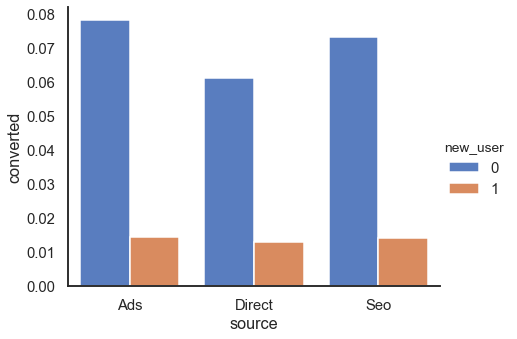

In [191]:
df_mean =  df.groupby(['source','new_user']).mean().reset_index()
print(df_mean)
sns.catplot(x="source", y="converted", hue="new_user", data=df_mean, kind="bar",height=5,aspect=1.3)

In [121]:
df.groupby(['country']).count().reset_index()

,country,age,new_user,source,total_pages_visited,converted
0,China,76602,76602,76602,76602,76602
1,Germany,13056,13056,13056,13056,13056
2,UK,48450,48450,48450,48450,48450
3,US,178092,178092,178092,178092,178092


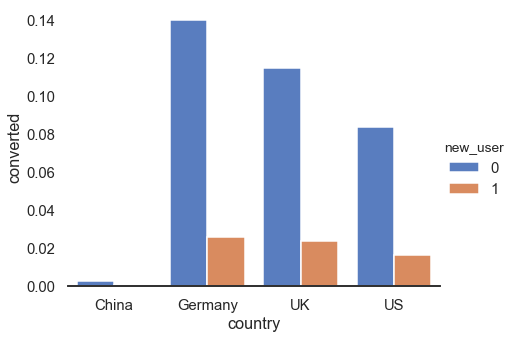

In [148]:
### nation wide 
sns.catplot(x="country", y="converted", hue="new_user", data=df_mean, kind="bar",height=5,aspect=1.3)
sns.despine(left=True) 

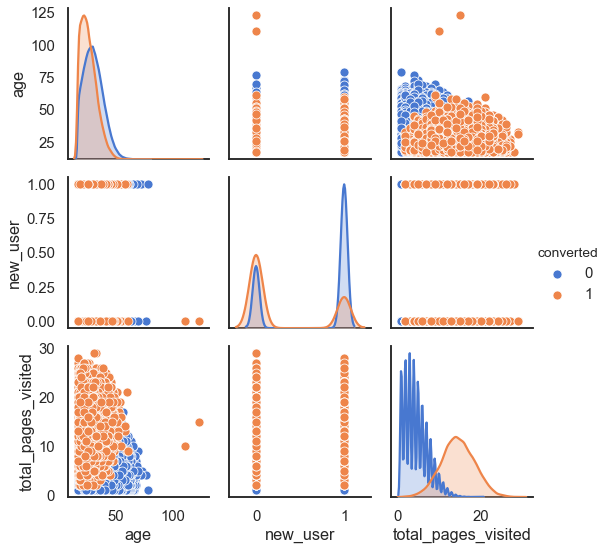

In [178]:
sns.pairplot(df,,hue = 'converted' )

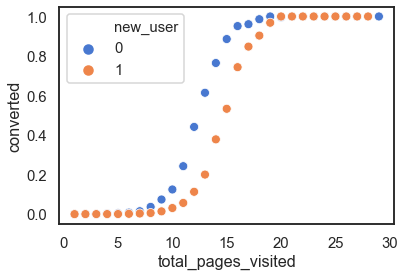

In [350]:
##  conversion rate vs PV 

df_pv = df.groupby(['total_pages_visited','new_user']).mean().reset_index()
df_pv
sns.scatterplot(x="total_pages_visited", y="converted",hue = 'new_user', data=df_pv ,markers= "+");

In [199]:
## see that , genrally new_user less to convert
##   Ads has better effect 
##  besides china, all other country perform much better 

df.groupby(['country','source','new_user']).mean().reset_index().sort_values('converted',ascending = False)

,country,source,new_user,age,total_pages_visited,converted
6,Germany,Ads,0,30.233660,6.019608,0.154412
10,Germany,Seo,0,30.214559,5.975096,0.141284
12,UK,Ads,0,30.108579,5.839572,0.125320
16,UK,Seo,0,30.258332,5.764881,0.117235
8,Germany,Direct,0,30.523282,5.780488,0.116408
14,UK,Direct,0,30.324000,5.486286,0.094571
18,US,Ads,0,30.329352,5.465150,0.090679
22,US,Seo,0,30.361442,5.403065,0.084901
20,US,Direct,0,30.340864,5.291609,0.071999
11,Germany,Seo,1,30.681169,4.828959,0.026934


In [302]:
df.groupby(['country','source','new_user']).count().reset_index().sort_values('converted',ascending = False)

,country,source,new_user,age,total_pages_visited,converted
23,US,Seo,1,59432,59432,59432
19,US,Ads,1,34076,34076,34076
21,US,Direct,1,27948,27948,27948
22,US,Seo,0,27797,27797,27797
5,China,Seo,1,26287,26287,26287
17,UK,Seo,1,16090,16090,16090
18,US,Ads,0,15825,15825,15825
1,China,Ads,1,15020,15020,15020
20,US,Direct,0,13014,13014,13014
3,China,Direct,1,12201,12201,12201


## ML part 

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix,classification_report

In [214]:
cate_df = df.select_dtypes(include=['object'])
cate_df = pd.get_dummies(cate_df)
df_new = pd.concat([df.drop(['country','source'],axis=1),cate_df],axis=1)

In [215]:
df_new

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,0,1,0,1,0
316197,25,0,4,0,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,0,1,0,0,1


In [217]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('converted',axis = 1), df_new['converted'], test_size=0.33, random_state=42)

In [219]:
lr = LogisticRegression()

In [221]:
lr.fit(X_train,y_train)

C:\Users\jpouu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
lr_pred = lr.predict(X_test)  

In [225]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    101645
           1       0.69      0.84      0.76      2701

    accuracy                           0.99    104346
   macro avg       0.84      0.92      0.88    104346
weighted avg       0.99      0.99      0.99    104346



In [227]:
from sklearn.metrics import accuracy_score

from numpy import loadtxt
from xgboost import XGBClassifier

In [298]:
xgb = XGBClassifier(max_depth = 5,learning_rate = 0.1,n_estimators = 500)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [299]:
xgb_pred = xgb.predict(X_test)

In [300]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    101655
           1       0.69      0.84      0.76      2691

    accuracy                           0.99    104346
   macro avg       0.84      0.92      0.88    104346
weighted avg       0.99      0.99      0.99    104346



In [231]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    101645
           1       0.69      0.84      0.76      2701

    accuracy                           0.99    104346
   macro avg       0.84      0.92      0.88    104346
weighted avg       0.99      0.99      0.99    104346



<BarContainer object of 10 artists>

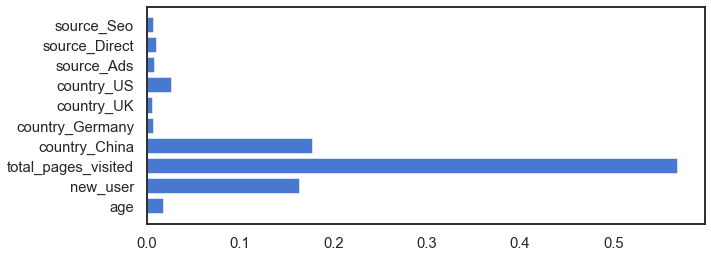

In [301]:
	
# plot feature importance
plt.figure(figsize=(10,4))
plt.barh(df_new.drop('converted',axis=1).columns,xgb.feature_importances_)

## Summary

* #### Total page view  and country china and new user were key fact determine the conversion
* ####  old user tend converted much higher rate in SEO and Ads  